# Data Cleaning and EDA
---

Import libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import  RegexpTokenizer
from nltk.stem import WordNetLemmatizer

## Load the Data
---

In [2]:
df = pd.read_csv('../../data/reddit_data_20220227-132529.csv')
df.drop(columns = 'Unnamed: 0', inplace=True)

In [3]:
df.head()

,author,title,selftext,subreddit,created_utc
0,RealDaveCorey,"Trying to straighten my leaning garage, was th...","Hi, I'm looking at torturing my leaning garage...",HomeImprovement,1645985955
1,ZeroCool1,Thoughts from two years into purchasing a fixe...,A few random thoughts after I've wrestled with...,HomeImprovement,1645985873
2,gwenstellamade,HELP! Fireplace contractors screwed up the job,"So, I’m in a bit of a pickle with my current f...",HomeImprovement,1645985865
3,happybaconbit,Kitchen cabinet track is broken. How do I fix it?,Photo: https://imgur.com/a/XgNq0iG \n\nIt’s be...,HomeImprovement,1645985826
4,stonetime10,OTR microwave with stud In the way,"Hello everyone,\nI am almost finished my basem...",HomeImprovement,1645985457


## Baseline Model
---

In [4]:
df['subreddit'].value_counts(normalize = True)

realestateinvesting    0.50025
HomeImprovement        0.49975
Name: subreddit, dtype: float64

The baseline/null model will predict realestateinvesting and HomeImprovement at about a 50/50 split with a slight preference to realestateinvesting. It will be accurage about 50% of the time. The goal is to create a model that will beat this null model and predict at a higher rate of accuracy.



Below, because realesateinvesting has a slight preference, this will be assigned a value of 1 and HomeImprovement will be assigned a value of 0 in the binarization. 

In [5]:
df['subreddit'] = df['subreddit'].replace({'HomeImprovement': 0, 'realestateinvesting':1})
df

,author,title,selftext,subreddit,created_utc
0,RealDaveCorey,"Trying to straighten my leaning garage, was th...","Hi, I'm looking at torturing my leaning garage...",0,1645985955
1,ZeroCool1,Thoughts from two years into purchasing a fixe...,A few random thoughts after I've wrestled with...,0,1645985873
2,gwenstellamade,HELP! Fireplace contractors screwed up the job,"So, I’m in a bit of a pickle with my current f...",0,1645985865
3,happybaconbit,Kitchen cabinet track is broken. How do I fix it?,Photo: https://imgur.com/a/XgNq0iG \n\nIt’s be...,0,1645985826
4,stonetime10,OTR microwave with stud In the way,"Hello everyone,\nI am almost finished my basem...",0,1645985457
...,...,...,...,...,...
3993,hossmanTK,Who do you use to do your taxes?,I have a duplex that I live in and rent. This ...,1,1643058056
3994,Due_Yogurtcloset3390,Southern California Fixers Available,[removed],1,1643057426
3995,theVirginAmberRose,what are some questions I should ask a constru...,tell me some stories if you got.\n\nwhat shoul...,1,1643054332
3996,Suzyswan,What to do if no real estate agent will contac...,Literally have cash in hand to buy 200k in lan...,1,1643054205


## EDA
---

In [6]:
df.describe()

,subreddit,created_utc
count,3998.000000,3.998000e+03
mean,0.500250,1.645034e+09
std,0.500062,8.315559e+05
min,0.000000,1.643054e+09
25%,0.000000,1.644420e+09
50%,1.000000,1.645383e+09
75%,1.000000,1.645643e+09
max,1.000000,1.645986e+09


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   author       3998 non-null   object
 1   title        3998 non-null   object
 2   selftext     3977 non-null   object
 3   subreddit    3998 non-null   int64 
 4   created_utc  3998 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 156.3+ KB


## Looking for and Removing Null Values
---

In [8]:
df.isnull().sum()

author          0
title           0
selftext       21
subreddit       0
created_utc     0
dtype: int64

In [9]:
df[df['selftext'].isna()]

,author,title,selftext,subreddit,created_utc
1162,[deleted],fdsfsag,NaN,0,1645513386
2158,SEPPwerBsnessTools4u,Is it absolutely necessary to vent bathroom fa...,NaN,1,1645667705
2227,wafflez77,Start offering under asking price,NaN,1,1645574831
2315,HoneyIShrunkTheTwins,Are stick built homes built better than modular?,NaN,1,1645463277
2413,[deleted],NY House Closing Time &amp; Good Deals,NaN,1,1645331281
2479,mrmcorkel,"Grant Deed to a home, next steps?",NaN,1,1645240204
2646,CA-ClosetApostate,Popping my post over here as it seems more rel...,NaN,1,1644995628
2710,Technical_Agent8109,Should I Sell a property with a building that ...,NaN,1,1644909382
2812,Bitball,Great news! Bitball Ecosystem’s token holders ...,NaN,1,1644737334
2836,Spur2120,Rental property sale and rental income.,NaN,1,1644707326


There are 21 rows that do no have seltext. Removing these rows would remove 0.5% of the overall data. That is a very small difference and should not affect the overall model. However, If I only use the title data, I could keep all of the rows. Another important item to note is that of the 21 rows, 20 are realestateinvesting rows. This will change the null model slightly. 

If I did remove the 21 rows, I could combine the title and selftext together to analayze. 

Is it possible to have a model that analyzing the title only and then analyzing the selftext? Would that be beneifical? 
___


At this stage, these rows will be removed. It may be necessary to go back and revert back to the original data later. 

The null model will be updated below.

In [10]:
df.dropna(subset=['selftext'], inplace = True)
df.isnull().sum()

author         0
title          0
selftext       0
subreddit      0
created_utc    0
dtype: int64

In [11]:
df.shape

(3977, 5)

Going to combine the Title and SelfText columns together to see if that makes a large difference in the models. Right now with a logistic regression model, I have an accuracy of 91.6%. I will see if this changes anything.

In [12]:
df['title_selftext'] = df['title']+ df['selftext']

Below, looked to see if stemming would help in terms of identify words.  The stemmer seems to have taken apart real words and produce words that are not fully written. Therefore, stemmer will not be used in the model.

In [13]:
def stemmer_porter(text_string):
    tokenizer = RegexpTokenizer(r'\w+')
    text_list = tokenizer.tokenize(text_string.lower())
    porter = PorterStemmer()
    return_list = []
    for i in range(len(text_list)):
        return_list.append(porter.stem(text_list[i]))
    stem_string = ' '.join(return_list)
    return(stem_string)
        

In [14]:
df['title_selftext'].map(stemmer_porter)

0       tri to straighten my lean garag wa the roof in...
1       thought from two year into purchas a fixer upp...
2       help fireplac contractor screw up the jobso i ...
3       kitchen cabinet track is broken how do i fix i...
4       otr microwav with stud in the wayhello everyon...
                              ...                        
3993    who do you use to do your tax i have a duplex ...
3994                southern california fixer avail remov
3995    what are some question i should ask a construc...
3996    what to do if no real estat agent will contact...
3997    ani valu on invest in empti residenti lot for ...
Name: title_selftext, Length: 3977, dtype: object

In [15]:
def lemmatizer(text_string):
    tokenizer = RegexpTokenizer(r'\w+')
    text_list = tokenizer.tokenize(text_string.lower())
    lemmatizer = WordNetLemmatizer()
    return_list = []
    for i in range(len(text_list)):
        return_list.append(lemmatizer.lemmatize(text_list[i]))
    stem_string = ' '.join(return_list)
    return(stem_string)


In [16]:
df['title_selftext']

0       Trying to straighten my leaning garage, was th...
1       Thoughts from two years into purchasing a fixe...
2       HELP! Fireplace contractors screwed up the job...
3       Kitchen cabinet track is broken. How do I fix ...
4       OTR microwave with stud In the wayHello everyo...
                              ...                        
3993    Who do you use to do your taxes?I have a duple...
3994        Southern California Fixers Available[removed]
3995    what are some questions I should ask a constru...
3996    What to do if no real estate agent will contac...
3997    Any value on investing in empty residential lo...
Name: title_selftext, Length: 3977, dtype: object

In [17]:
df['title_selftext'] = df['title_selftext'].map(lemmatizer)
df['title_selftext']

0       trying to straighten my leaning garage wa the ...
1       thought from two year into purchasing a fixer ...
2       help fireplace contractor screwed up the jobso...
3       kitchen cabinet track is broken how do i fix i...
4       otr microwave with stud in the wayhello everyo...
                              ...                        
3993    who do you use to do your tax i have a duplex ...
3994          southern california fixer available removed
3995    what are some question i should ask a construc...
3996    what to do if no real estate agent will contac...
3997    any value on investing in empty residential lo...
Name: title_selftext, Length: 3977, dtype: object

Comparing the lemmatized column vs the non-lemmatized column, there are some changes. I have already gone through this process once without lemmatizing. I want to see if this makes a big difference.

In [18]:
df.isnull().sum()

author            0
title             0
selftext          0
subreddit         0
created_utc       0
title_selftext    0
dtype: int64

## Updated Baseline Model
---

In [19]:
df['subreddit'].value_counts(normalize = True)

0    0.502137
1    0.497863
Name: subreddit, dtype: float64

Removing the 21 rows of null selftext changed the model slightly. It is still essentially a 50/50 split, but now there is a slight preference towards HomeImprovement. So the baseline/null model will predict HomeImprovement and be accurate about 50% of the time. 

## EDA - Feature Engineering
---
Looking at title lengths, title word counts, unique users.

In [20]:
df['title_text_length'] = df['title_selftext'].str.len()
df.head()

,author,title,selftext,subreddit,created_utc,title_selftext,title_text_length
0,RealDaveCorey,"Trying to straighten my leaning garage, was th...","Hi, I'm looking at torturing my leaning garage...",0,1645985955,trying to straighten my leaning garage wa the ...,1136
1,ZeroCool1,Thoughts from two years into purchasing a fixe...,A few random thoughts after I've wrestled with...,0,1645985873,thought from two year into purchasing a fixer ...,4077
2,gwenstellamade,HELP! Fireplace contractors screwed up the job,"So, I’m in a bit of a pickle with my current f...",0,1645985865,help fireplace contractor screwed up the jobso...,1795
3,happybaconbit,Kitchen cabinet track is broken. How do I fix it?,Photo: https://imgur.com/a/XgNq0iG \n\nIt’s be...,0,1645985826,kitchen cabinet track is broken how do i fix i...,248
4,stonetime10,OTR microwave with stud In the way,"Hello everyone,\nI am almost finished my basem...",0,1645985457,otr microwave with stud in the wayhello everyo...,709


In [21]:
df['title_text_word_count'] = [len(word.split(' ')) for word in df['title_selftext']]
df.head()

,author,title,selftext,subreddit,created_utc,title_selftext,title_text_length,title_text_word_count
0,RealDaveCorey,"Trying to straighten my leaning garage, was th...","Hi, I'm looking at torturing my leaning garage...",0,1645985955,trying to straighten my leaning garage wa the ...,1136,219
1,ZeroCool1,Thoughts from two years into purchasing a fixe...,A few random thoughts after I've wrestled with...,0,1645985873,thought from two year into purchasing a fixer ...,4077,816
2,gwenstellamade,HELP! Fireplace contractors screwed up the job,"So, I’m in a bit of a pickle with my current f...",0,1645985865,help fireplace contractor screwed up the jobso...,1795,351
3,happybaconbit,Kitchen cabinet track is broken. How do I fix it?,Photo: https://imgur.com/a/XgNq0iG \n\nIt’s be...,0,1645985826,kitchen cabinet track is broken how do i fix i...,248,55
4,stonetime10,OTR microwave with stud In the way,"Hello everyone,\nI am almost finished my basem...",0,1645985457,otr microwave with stud in the wayhello everyo...,709,139


In [22]:
df.sort_values('title_text_word_count', ascending = False)[['title_selftext', 'subreddit']]

,title_selftext,subreddit
2907,what adventure await update to hoarder propert...,1
1393,desperately need advice on septic problemssorr...,0
795,advice on next step cabinet from the rta store...,0
1212,trying to find reason for attic condensation s...,0
1089,converting home into rentalhi i have a small h...,0
...,...,...
2699,coin98 removed,1
2698,rorgame removed,1
3472,question removed,1
3343,quiz removed,1


It is interesting that the top 5 longer titles mostly in home improvement. I want to look at a histogram of the spread for each subreddit.

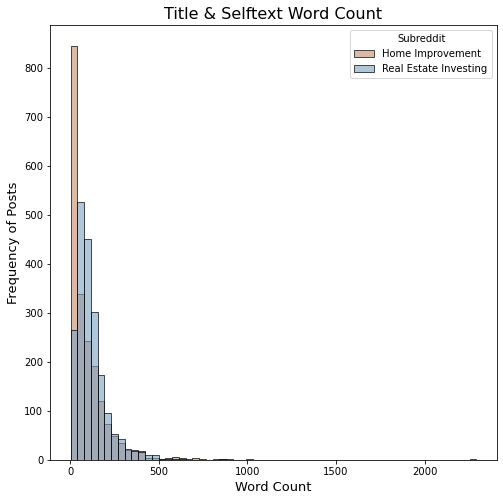

In [23]:
plt.figure(figsize = (8,8))
sns.histplot(df, x="title_text_word_count", hue="subreddit", alpha= 0.6, palette = "twilight_shifted", label = False, bins = 60)
plt.legend(title='Subreddit', loc='upper right', labels=['Home Improvement', 'Real Estate Investing'])
plt.title('Title & Selftext Word Count', fontdict = {'fontsize': 16})
#plt.rc('axes', titlesize=2)
plt.xlabel('Word Count', fontdict = {'fontsize': 13})
plt.ylabel('Frequency of Posts', fontdict = {'fontsize': 13});
plt.savefig("../../images/Titleselftext_wordcount.jpg", bbox_inches="tight", dpi=100);

Home Improvement seems to have a much smaller title and self text on average compared to Real Estate Investing. Both graphs are skewed right with some outliers in the high 2000's.

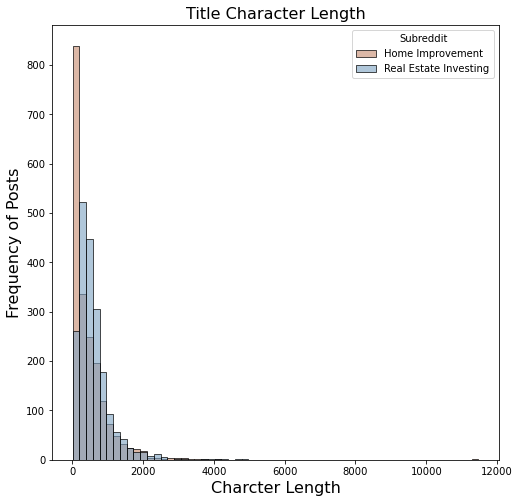

In [24]:
plt.figure(figsize = (8,8))
sns.histplot(df, x="title_text_length", hue="subreddit", alpha= 0.6, palette = "twilight_shifted", label = False, bins = 60)
plt.legend(title='Subreddit', loc='upper right', labels=['Home Improvement', 'Real Estate Investing'])
plt.title('Title Character Length', fontdict = {'fontsize': 16})
plt.rc('axes', titlesize=2)
plt.xlabel('Charcter Length', fontdict = {'fontsize': 16})
plt.ylabel('Frequency of Posts', fontdict = {'fontsize': 16});

Again, Home Improvement seems to have a much smaller Character lenght on average comared to Real Estate Investing.  There appear to be some outliers as the graphs are skewed right. 

#### How many unique users in each subreddit?

In [25]:
df.loc[df['subreddit'] == 0]['author'].value_counts()

ImpossibleZero        6
Everest-mechanical    5
Ronnysamsonnz         4
MidnightSailing       4
namelessfingernail    4
                     ..
smontres              1
RazzTheGhost          1
amishyoga347          1
jwp87                 1
alinktothepast2022    1
Name: author, Length: 1824, dtype: int64

In [26]:
df.loc[df['subreddit'] == 1]['author'].value_counts()

rapp17                  17
Nasir18018              14
Civil_REI                8
Feisty-Perception598     7
grahamsonaroadtrip       7
                        ..
NefariousnessUsed607     1
theycallmebundy          1
Double-Truth-3916        1
enaifosky                1
keroppikokoro            1
Name: author, Length: 1567, dtype: int64

There appears to be a vast variety of authors on both subreddits. The largest number of posts by any one author is 17 an in the RealEstateInvesting subreddit.

In [27]:
df.dtypes

author                   object
title                    object
selftext                 object
subreddit                 int64
created_utc               int64
title_selftext           object
title_text_length         int64
title_text_word_count     int64
dtype: object

## EDA -  Word Counts
---
Will do count vectorization to perform EDA on word counts.

In [28]:
X_status = df['title_selftext'] 

cvec = CountVectorizer(stop_words = 'english')

cvec.fit(X_status)

X_cvec = cvec.transform(X_status)

title_cvec = pd.DataFrame(X_cvec.todense(), columns = cvec.get_feature_names())
title_cvec

,00,000,000ish,000k,000sq,000w,001438,003,00byk7lhkvkqhs6tsremyc7ea,01,...,zpcin2o,zpnxsv3,zq23bot,ztiozzi,ztzlqx0,zumper,zurn,zv1fuxsrvzzbhaufwselyvb5vzhgtegpbiabijs0zzubldiexfdpm6cl23iy0muzwmhyktgzqrqlut4iqfx9clf,zwave,zzf8oxs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3972,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3973,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The word 'subreddit' is used inside of titles. This complicates things as there is a column for the target called subreddit. This will be changed to subreddit_target.

In [29]:
df['subreddit_target'] = df['subreddit']
df.drop(columns = 'subreddit', inplace=True)

Combining the new cvec dataframe with the subreddit column.

In [30]:
text_and_subreddit = pd.concat([title_cvec, df['subreddit_target']], axis = 1, join = 'inner')
text_and_subreddit.reset_index(drop=True)

,00,000,000ish,000k,000sq,000w,001438,003,00byk7lhkvkqhs6tsremyc7ea,01,...,zpnxsv3,zq23bot,ztiozzi,ztzlqx0,zumper,zurn,zv1fuxsrvzzbhaufwselyvb5vzhgtegpbiabijs0zzubldiexfdpm6cl23iy0muzwmhyktgzqrqlut4iqfx9clf,zwave,zzf8oxs,subreddit_target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3951,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3952,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3953,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3954,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
text_and_subreddit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3956 entries, 0 to 3976
Columns: 14637 entries, 00 to subreddit_target
dtypes: int64(14637)
memory usage: 441.8 MB


#### What are the top 25 words in each subreddit?

Top 25 words in the Home Improvement Subreddit

In [32]:
text_and_subreddit.groupby('subreddit_target').sum(1).T.sort_values(0, ascending = False)[[0]][:25]

subreddit_target,0
http,1107
com,1103
wall,957
wa,941
house,938
imgur,912
just,899
like,779
water,729
ha,647


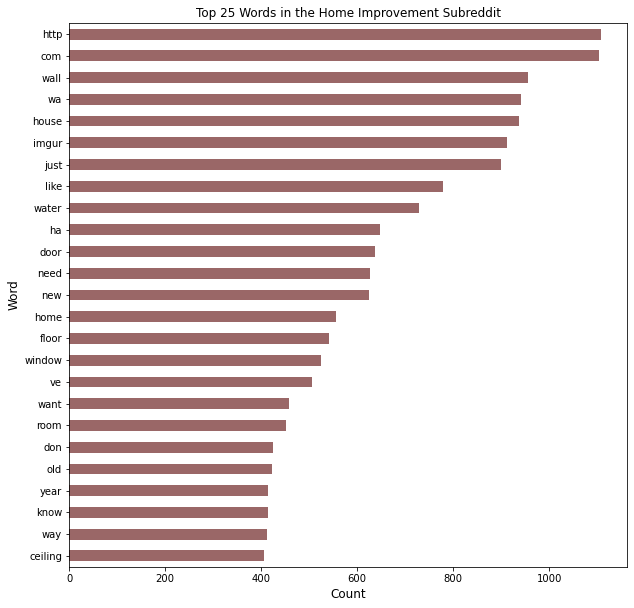

In [33]:
plt.rcParams["figure.figsize"]=(10,10)
text_and_subreddit.groupby('subreddit_target').sum(1).T.sort_values(0, 
                                                                    ascending = True)[[0]][-25:].plot(kind = 'barh', 
                                                                                                      legend = None,
                                                                                                      color = '#9a6767'
)
plt.title('Top 25 Words in the Home Improvement Subreddit', fontdict = {'fontsize': 12})
plt.xlabel('Count', fontdict = {'fontsize': 12})
plt.yticks(fontsize = 10)
plt.ylabel('Word', fontdict = {'fontsize': 12});


Top 25 words in the Real Estate Investing Subreddit

In [34]:
text_and_subreddit.groupby('subreddit_target').sum(1).T.sort_values(1, ascending = False)[[1]][:25]

subreddit_target,1
property,1511
house,811
home,797
year,743
removed,710
rent,654
rental,537
real,535
just,532
estate,506


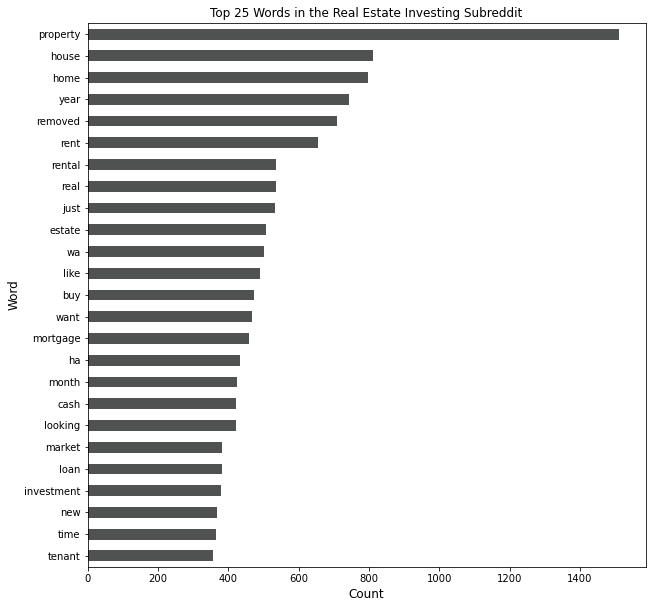

In [35]:
plt.rcParams["figure.figsize"]=(10,10)
text_and_subreddit.groupby('subreddit_target').sum(1).T.sort_values(1, ascending = True)[[1]][-25:].plot(kind = 'barh', 
                                                                                                      legend = None,
                                                                                                      color = '#505252'
)
plt.title('Top 25 Words in the Real Estate Investing Subreddit', fontdict = {'fontsize': 12})
plt.xlabel('Count', fontdict = {'fontsize': 12})
plt.yticks(fontsize = 10)
plt.ylabel('Word', fontdict = {'fontsize': 12});

There does not appear to be much overlap. This should make creating a model that accurately predicts the subreddit feasible.

Going to look at common word combinations below for reach subreddit.

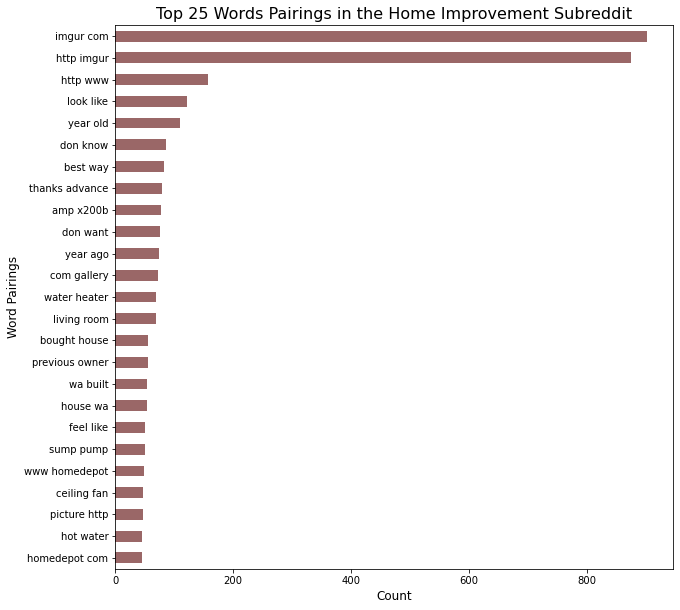

In [36]:
X_status = df['title_selftext'] 

cvec_bi = CountVectorizer(stop_words = 'english', ngram_range=(2, 2))

cvec_bi.fit(X_status)

X_cvec_bi = cvec_bi.transform(X_status)

status_bigrams_cvec = pd.DataFrame(X_cvec_bi.todense(), columns = cvec_bi.get_feature_names())

bigrams_and_subreddit = pd.concat([status_bigrams_cvec, df['subreddit_target']], axis = 1, join = 'inner')
bigrams_and_subreddit.reset_index(drop=True)


plt.rcParams["figure.figsize"]=(10,10)
bigrams_and_subreddit.groupby('subreddit_target').sum(0).T.sort_values(0 ,ascending=True)[[0]].tail(25).plot(kind = 'barh', 
                                                                                                      legend = None,
                                                                                                      color = '#9a6767'
)
plt.title('Top 25 Words Pairings in the Home Improvement Subreddit', fontdict = {'fontsize': 16})
plt.xlabel('Count', fontdict = {'fontsize': 12})
plt.yticks(fontsize = 10)
plt.ylabel('Word Pairings', fontdict = {'fontsize': 12});
plt.savefig("../../images/top25_pair_hi.jpg", bbox_inches="tight", dpi=100);

The imgur peaked my attention as this typically refers to a picture. Looking at the subreddit itself and searching for imgur, it appears that people are posting pictures of issue they need to fix in their home improvement project.

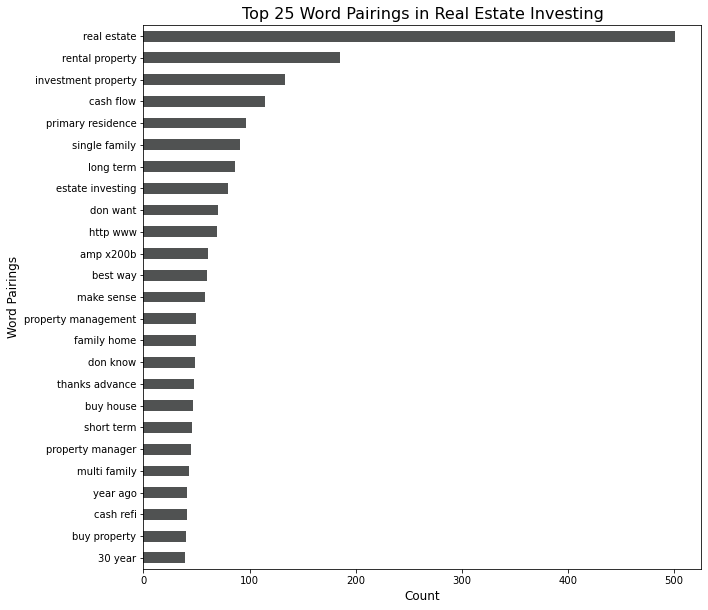

In [37]:
X_status = df['title_selftext'] 

cvec_bi = CountVectorizer(stop_words = 'english', ngram_range=(2, 2))

cvec_bi.fit(X_status)

X_cvec_bi = cvec_bi.transform(X_status)

status_bigrams_cvec = pd.DataFrame(X_cvec_bi.todense(), columns = cvec_bi.get_feature_names())

bigrams_and_subreddit = pd.concat([status_bigrams_cvec, df['subreddit_target']], axis = 1, join = 'inner')
bigrams_and_subreddit.reset_index(drop=True)


plt.rcParams["figure.figsize"]=(10,10)
bigrams_and_subreddit.groupby('subreddit_target').sum(1).T.sort_values(1 ,ascending=True)[[1]].tail(25).plot(kind = 'barh', 
                                                                                                      legend = None,
                                                                                                      color = '#505252'
)
plt.title('Top 25 Word Pairings in Real Estate Investing',fontdict = {'fontsize': 16})
plt.xlabel('Count', fontdict = {'fontsize': 12})
plt.ylabel('Word Pairings', fontdict = {'fontsize': 12})
plt.savefig("../../images/top25_pair_rei.jpg", bbox_inches="tight", dpi=100);

Five of the top 6 word pairings are refering to real estate and the type of property. This is missing in the Home Improvement subreddit top 25 words. While there does appear to be some overlap ('don know'), there appears to be enough of a delineation that a predictive model can be successfully created.

## Save File as Cleaned Data
---
The count vectorization that was done here for purely for EDA purposes. This will be run through a pipeline model in the next stage.

In [38]:
file_path = f'../../data/data_clean_combo_{time.strftime("%Y%m%d-%H%M%S")}.csv'
df.to_csv(file_path)